#  DATA SCIENCE JOBS
## THE BRIDGE (DS-Bootcamp - Proyecto Individual Agosto 2020)

________________
### Análisis de datos asociados a la oferta de empleo en Data Science

Fuente de datos (Data Set)  https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor

Elaborado por : 

- ** Mónica Villasuso López  **  
villasuso.monica@gmail.com  
git @MVillasuso
_________________

## `MOTIVACIÓN / PROPÓSITO DEL PROYECTO` (.. o una reflexión personal)  

Durante el último año, uno de mis objetivos personales se ha centrado en como orientar mi futuro profesional de cara a las necesidades actuales, la tecnología y tomando en cuenta mi perfil e intereses. Gran cantidad de estudios recientes, ubican a las profesiones relacionadas con los datos entre las más demandadas por las organizaciones debido a la transformación digital masiva y el incremento exponencial de la información almacenada que no sirve de nada si no es procesada adecuada y oportunamente.  
 
Dado esto, y luego de revisar cientos de ofertas y sitios de empleo, de haber terminado en Marzo 2020 un curso de una de las principales herramientas de BI (Tableau), de haberme documentado sobre los principios "ágiles" con los que actualmente se gestiona el desarrollo de software y de haber leído muchos artículos relacionados con la tecnología decido, en Mayo 2020, formarme de forma intensiva en un Boot Camp en Data Science.  
 
Ahora, a medio camino me pregunto: ¿me acerca esto realmente al mercado laboral? ¿Cómo es realmente la oferta? ¿Qué perfiles son los más demandados para entrar en este mundo? ¿Cómo son los salarios? ¿Es más conveniente pensar formarme en el área de Gerencia de Proyectos? Son muchas inquietudes y, antes de entrar en este prometedor mundo, quiero saber con certeza que dirección tomar.  Entonces, ¿tiene seguido incursionar en "Data Science" sin haber analizado los datos de posibilidades de empleo en este sector?   ...sería un buen ejercicio para comenzar….  


 

## `CONTEXTO  - ALCANCE DEL PROYECTO ` 

Luego de revisar los perfiles y roles relacionados con Data Science, los he agrupado en 5. A  continuación algunas consideraciones que ayudarán a comprender el proyecto :
- Parala revisión de los principales sitios de búsqueda de empleo se consideraron los más importantes actualmente:  Indeed, Glassdoor y Linkedin. También tomé en cuenta la disponibilidad de datos y factibilidad/facilidad  de obtenerlos.
- Debido a las restricciones de tiempo  seleccioné Glassdoor (el segundo sitio más grande) como fuente de información pues ya existía un data set disponible con el cual realizar el análisis.  
- El data set contiene información de la oferta tecnológíca en Glassdoor al 15 de Noviembre de 2019.
- En el proceso de Data Wrangling se "mapeó"la oferta disponible a los roles definidos según lo siguiente:  
    Data Analist:  
    Business Analist:  
    Data Engineer:    
    Data Scientist:  
    Machine Learning / Artificial Intelligence:  
    Project Manager:  
    Other:  
- Siendo los perfiles de análisis (datos y negocio) los más básicos y por ello, por los que es más fácil comenzar a desarrollarme en esta área, me pregunto si concentran una buena cantidad de la oferta laboral o si, por el contrario, el mercado está requiriendo en su mayoría  perfiles más avanzados o especializados con lo cual es más dificil tener acceso a ellos sin experiencia previa.

## `HIPÓTESIS`
### "Al menos la mitad, (50%), de la oferta laboral en el área de ** Ciencia de Datos, ** corresponde a los perfiles de Análisis (Datos y Negocio)"

## `1.` Librerías requeridas para el análisis (* Import *)
_________

In [1]:
import sys
sys.path.append("../src/utils")
sys.path.append(os.path.dirname(os.getcwd()) + "/src/utils")
sys.path.append(os.path.dirname(os.getcwd()) + "/resources")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folders_tb as ftb
import visualization_tb as vtb
import miningdata_tb as mtb

## `2.` Carga de datos inicial, de la fuente, en el dataframe        

____________

### Información global de Glassdoor.com   (segundo portal más importante de búsqueda de empleo en el mundo)
** Actualizado a Dic 2019 **  
Dataset con búsquedas para los siguientes perfiles

* data-scientist		**
* software-engineer
* data-analyst			**
* research-scientist
* business-analyst		**
* product-manager
* project-manager
* data-engineer		**
* statistician
* dba
* database-engineer
* machine-learning-engineer **

https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor  
glassdoor.csv  
country_names_2_digit_codes.csv

Información de continentes y códigos de países  

https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#data  
Continent_Name.csv

In [2]:
GlassD_df= pd.read_csv("../resources/dataset/glassdoor.csv", sep=",")
cnames_df = pd.read_csv("../resources/dataset/country_names_2_digit_codes.csv", sep =",")
cont_names_df = pd.read_csv("../resources/dataset/Continent_Name.csv", sep =",")

## Otras referencias consultadas
https://www.simplilearn.com/business-analyst-vs-data-analyst-article  
https://blog.udacity.com/2014/11/data-science-job-skills.html

## `3.` Preparación de los datos - `Data Wrangling and Data Cleaning`
________________
Exploración de los datos del dataframe

### df_GlassD
Dataframe original con la información obtenida de la carga del Data Set

In [3]:
GlassD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165290 entries, 0 to 165289
Columns: 163 entries, benefits.benefitRatingDecimal to wwfu
dtypes: bool(11), float64(35), int64(23), object(94)
memory usage: 193.4+ MB


### GDjobs_df
Creación de un subconjunto del Dataset original para lo cual es necesario:   
- Eliminar las columnas con información no relevante para el análisis  
- Transformar los tipos de datos útiles para el análisis  
- Estandarizar los códigos de países para poder utilizarlos posteriormente
- Eliminar los registros duplicados


In [4]:

GDjobs_df = mtb.elim_cols(GlassD_df)
GDjobs_df = mtb.transf_cols(GDjobs_df)


*** NOTA: De las 163 columnas originales quedaron  19. ***

In [5]:
GDjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110822 entries, 0 to 165289
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   empSize      98670 non-null   object        
 1   easyApply    110822 non-null  bool          
 2   empName      108660 non-null  object        
 3   jobTitle     110822 non-null  object        
 4   jobDate      110822 non-null  datetime64[ns]
 5   salHigh      2438 non-null    float64       
 6   salLow       2438 non-null    float64       
 7   jobDesc      110819 non-null  object        
 8   jobSource    110822 non-null  object        
 9   country      77354 non-null   object        
 10  lat          110822 non-null  float64       
 11  long         110822 non-null  float64       
 12  location     110819 non-null  object        
 13  foundedYear  110822 non-null  int64         
 14  industry     78957 non-null   object        
 15  revenue      98670 non-null   obje

In [6]:
GDjobs_df.describe(include="all")

empSize easyApply empName         jobTitle              jobDate  \
count      98670    110822  108660           110822               110822   
unique         8         2   31114            64844                  248   
top     10000--1     False  Amazon  Project Manager  2019-11-01 00:00:00   
freq       32799     98966    1683             3161                 9484   
first        NaN       NaN     NaN              NaN  2017-01-21 00:00:00   
last         NaN       NaN     NaN              NaN  2019-11-10 00:00:00   
mean         NaN       NaN     NaN              NaN                  NaN   
std          NaN       NaN     NaN              NaN                  NaN   
min          NaN       NaN     NaN              NaN                  NaN   
25%          NaN       NaN     NaN              NaN                  NaN   
50%          NaN       NaN     NaN              NaN                  NaN   
75%          NaN       NaN     NaN              NaN                  NaN   
max          NaN       NaN     NaN              NaN                  NaN   

              salHigh         salLow  \
count     2438.000000    2438.000000   
unique            NaN            NaN   
top               NaN            NaN   
freq              NaN            NaN   
first             NaN            NaN   
last              NaN            NaN   
mean    115321.336751   77344.035275   
std      42232.459889   30614.990457   
min         13.000000      10.000000   
25%      85000.000000   55264.500000   
50%     108843.500000   71553.000000   
75%     139455.000000   94978.500000   
max     376948.000000  236650.000000   

                                                  jobDesc  \
count                                              110819   
unique                                             107692   
top     Credit Suisse Careers Credit Suisse Menu Job S...   
freq                                                   24   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                       jobSource country            lat           long  \
count                     110822   77354  110822.000000  110822.000000   
unique                       217     503            NaN            NaN   
top     Indeed XML Feed Employer      BE            NaN            NaN   
freq                       35663    3057            NaN            NaN   
first                        NaN     NaN            NaN            NaN   
last                         NaN     NaN            NaN            NaN   
mean                         NaN     NaN      26.535580      29.663674   
std                          NaN     NaN      25.972731      62.602891   
min                          NaN     NaN     -77.850000    -171.983300   
25%                          NaN     NaN       3.000000       0.000000   
50%                          NaN     NaN      33.871900      12.044750   
75%                          NaN     NaN      48.866700      77.587300   
max                          NaN     NaN      67.183300     177.366700   

         location    foundedYear                      industry  \
count      110819  110822.000000                         78957   
unique       7074            NaN                           137   
top     Singapore            NaN  Computer Hardware & Software   
freq         3436            NaN                          9430   
first         NaN            NaN                           NaN   
last          NaN            NaN                           NaN   
mean          NaN    1272.696

Estandarización de la información correspondiente al país

In [7]:
GDjobs_df = mtb.norm_country(GDjobs_df, cnames_df)
GDjobs_df = mtb.ubicar_loc(GDjobs_df)

** NOTA: Se agregaron las  columnas ccode y cname con la información estandarizada del país  (código y nombre) **

Asignar  experiencia requerida , nivel del puesto y tipo de trabajo según la información contenida en el campo JobTitle

In [8]:
GDjobs_df = mtb.experience (GDjobs_df)
GDjobs_df = mtb.level (GDjobs_df)
GDjobs_df = mtb.jobType(GDjobs_df)

Completar con el valor NA (Not available) los campos en los que la información no exista (valores Nan,None, nulls)

In [9]:
GDjobs_df = mtb.llenar_na(GDjobs_df)


** RESULTADO DATA WRANGLING:   
- De las 165290 filas del  DF original se eliminaron (por inconsistencias) alrededor del 35%, quedando 104486 registros 
- Se agregaron 6 columnas con información estandarizada y que facilita la interpretación
- Se redujo la memoria utilizada por el dataset  en más de 90%% (De 193 MB a 19 MB)

In [10]:
GDjobs_df.shape

(104486, 25)

In [11]:
GDjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104486 entries, 0 to 110818
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   empSize      104486 non-null  object        
 1   easyApply    104486 non-null  bool          
 2   empName      104486 non-null  object        
 3   jobTitle     104486 non-null  object        
 4   jobDate      104486 non-null  datetime64[ns]
 5   salHigh      2424 non-null    float64       
 6   salLow       2424 non-null    float64       
 7   jobDesc      104486 non-null  object        
 8   jobSource    104486 non-null  object        
 9   country      104486 non-null  object        
 10  lat          104486 non-null  float64       
 11  long         104486 non-null  float64       
 12  location     104486 non-null  object        
 13  foundedYear  104486 non-null  int64         
 14  industry     104486 non-null  object        
 15  revenue      104486 non-null  obje

### res_df
Creación de  un DF resumen (agrupado por los principales campos) para comenzar el análisis de tendencias los datos

In [12]:
res_df = mtb.resumen_df(GDjobs_df)

### cjob_df
Dataframe  para posteriormnte asignar (a través de un merge la clasificación (JobClas) de los diferentes roles (JobType)

In [13]:

cjob_df = pd.DataFrame({'jobClas': ['Other', 'Project Mgmt.', 'Data Science','Data Science','Data Science','Data Science','Data Science'] , 
                    "jobType": ['Other', 'Project Manager', 'Business Analyst', 'Data Scientist','Data Analyst','Data Engineer', 'ML_AI']})

In [14]:
cjob_df

jobClas           jobType
0          Other             Other
1  Project Mgmt.   Project Manager
2   Data Science  Business Analyst
3   Data Science    Data Scientist
4   Data Science      Data Analyst
5   Data Science     Data Engineer
6   Data Science             ML_AI

In [15]:
res_df.jobType.value_counts()

Other               29225
Project Manager      4351
Business Analyst     3968
Data Scientist       2792
Data Analyst         2479
Data Engineer        2072
ML_AI                 973
Name: jobType, dtype: int64

#### Asignación de clasificación de trabajo (jobClas) según cada rol

In [16]:
res_df=pd.merge(res_df,cjob_df,on="jobType", how='left')

In [17]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45860 entries, 0 to 45859
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          45860 non-null  int64  
 1   empSize       45860 non-null  object 
 2   sector        45860 non-null  object 
 3   industry      45860 non-null  object 
 4   type          45860 non-null  object 
 5   ccode         45860 non-null  object 
 6   cname         45860 non-null  object 
 7   exp           45860 non-null  object 
 8   level         45860 non-null  object 
 9   jobType       45860 non-null  object 
 10  total         45860 non-null  int64  
 11  salLow_min    1518 non-null   float64
 12  salLow_max    1518 non-null   float64
 13  salLow_mean   1518 non-null   float64
 14  salHigh_min   1518 non-null   float64
 15  salHigh_max   1518 non-null   float64
 16  salHigh_mean  1518 non-null   float64
 17  sal_mean      45860 non-null  float64
 18  jobClas       45860 non-nu

### DS_df
Creación de  un `DF resumen` de los trabajos asociados a ciencia de datos  (agrupado por los principales campos) para comenzar el análisis de tendencias los datos específico para este tipo de ofertas

In [18]:
DS_df = res_df[res_df.jobClas == "Data Science"]

## `4.` Análisis de tendencias en los datos (`EDA)`
________________

### Estandarización paleta de colores discretos (diccionarios) para los gráficos

In [19]:
color_jTpie = { 'Data Analyst': 'lightyellow','Business Analyst': 'lightgreen', 'Data Engineer': 'lightblue', 'Data Scientist': 'pink', 'ML_AI': 'violet','Project Manager': 'grey' , 'Other': 'wheat'}

color_jT = { 'Data Analyst': 'lightyellow','Business Analyst': 'lightgreen', 'Data Engineer': 'lightblue', 'Data Scientist': 'pink', 'ML_AI': 'violet','Project Manager': 'lightgrey' , 'Other': 'linen'}

color_jT2 = { 'Data Analyst': 'yellow','Business Analyst': 'green', 'Data Engineer': 'blue', 'Data Scientist': 'palevioletred', 'ML_AI': 'mediumorchid','Project Manager': 'grey' , 'Other': 'wheat'}

color_exp={'Senior': 'indianred', 'Junior': 'paleturquoise', 'Internship': 'sandybrown', 'N/A': 'thistle'}

color_level = {'Analyst': 'lightblue','Technical': 'lightcoral','Scientist': 'lightyellow','PMO':'lightgreen','Consultant':'lightpink', 'Manager':'lightsalmon',
 'N/A':'lightseagreen','Developer':'lightgoldenrodyellow','Research': 'lightslategray','Product': 'ivory','Dba': 'lavender','Director':'linen','Assistant': 'mistyrose'}

color_sector = {'Business Services': 'lightblue','Information Technology': 'wheat','Finance': 'lightgreen','Accounting & Legal':'khaki','N/A':'lightgrey', 'Insurance':'lightsalmon', 'Telecommunications': 'palevioletred', 'Biotech & Pharmaceuticals' : 'linen', 'Healthcare': 'steelblue', 'Consumer Services': 'pink', 'Aerospace & Defence ': 'rosybrown'}

# Orden de la empresa segun tamano (numero de empleados)
lord= ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000','10000--1', 'N/A']

colors_fase={"Definición":"thistle", "Planificación y Diseño": "steelblue", "Desarrollo": "paleturquoise", "API Server": "lightyellow", "Conclusiones": "khaki", "Documentación": "darkseagreen", "Entregable": "blue" }

colors_etapa =  {'Jupiter Notebook': 'khaki','Data Analysis (EDA)': 'teal','Data Collection': 'mediumturquoise',"Delivery Zip File'": 'blue','Definición del proyecto individual': 'thistle','Data Wrangling and cleaning': 'cadetblue','API Server': 'lightyellow','Planificación Proyecto Trello': 'steelblue','Documentación': 'darkseagreen','Presentación': 'mediumseagreen'}

## `4.1` Análisis preliminar de tendencias. Validación de hipótesis

### PIE CHARTS

In [20]:
vtb.graf_pie(df=res_df,val="total",col='jobType', tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL", lcolor= color_jTpie, fname= "RolDS_pie" )


De la totalidad de oferta de empleos técnicos ,  
*** 21% corresponde a trabajos relacionados con Datos   ***   
9% a Gerencia de Proyectos  
70% a otros trabajos técnicos (tal como Desarrollo de Sofware/aplicaciones, Soporte Técnico, Gerencia de Operaciones, Calidad , Ingenieros de software, Científicos o Investigadores)
  
  ... analicemos en detalle este 21%

In [21]:
vtb.graf_sbpie (df=res_df,lpath= ['jobClas', 'jobType'],val = (res_df['total']/res_df['total'].sum())*100 ,col = "jobType",lcolor = color_jTpie,tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL (%)", det=True, fname="RolDS_SBporc")

vtb.graf_sbpie (df=res_df,lpath= ['jobClas', 'jobType'],val = res_df['total'] ,col = "jobType",lcolor = color_jTpie,tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL (total)", det = True, fname= "RolDS_SBtot")


Vemos que dentro del 21% que representa la oferta de  Data Science el 55%, corresponde a perfiles de Análisis de Datos y Análisis de Negocios (un 11,5% del total de la ofertas analizadas)

Con lo anterior se confirma la hipótesis planteada:  
** "Al menos la mitad, (50%), de la oferta laboral en el área de ** `Ciencia de Datos`, ** corresponde a los perfiles de Análisis (Datos y Negocio)" **
... De hecho según los datos disponibles, la oferta para estos roles representa  el 55% del total 


### BAR CHARTS

### Por Industria

In [22]:

vtb.graf_bar('industry', "jobType", DS_df,16,"N/A", color_jT,[], 'Industria', 'Total', 'OFERTA DATA SCIENCE POR INDUSTRIA', 'ROL', False, "RolDS_Industry" )


In [23]:
DS_df.total.sum()

21936

In [24]:
DS_df.groupby("industry").total.sum().nlargest(10)

industry
N/A                                        6623
It Services                                1805
Staffing & Outsourcing                     1686
Computer Hardware & Software               1227
Internet                                   1143
Consulting                                 1080
Enterprise Software & Network Solutions     852
Investment Banking & Asset Management       710
Banks & Building Societies                  478
Advertising & Marketing                     406
Name: total, dtype: int64

Sólo el 70% de los registros clasificados como roles de Data Scientist tenían la industria tipificada. De estos las primeras 5  (en las que se concentra el  45% de la oferta) se concentra en la industria tecnológica y de consultoría.    
Si vemos la gráfica por industria únicamente para el rol de Business Analist, el sector de Banca e Inversión desplaza a Internet  y se coloca  entre los 5 primeros. 

### Por Sector

In [25]:
DS_df.sector.value_counts(normalize=True)

Information Technology                    0.242836
N/A                                       0.196516
Business Services                         0.162406
Finance                                   0.085640
Manufacturing                             0.053728
Retail                                    0.031586
Insurance                                 0.028167
Media                                     0.022712
Accounting & Legal                        0.021329
Biotech & Pharmaceuticals                 0.020596
Telecommunications                        0.019700
Travel & Tourism                          0.015467
Transportation & Logistics                0.014979
Oil, Gas, Energy & Utilities              0.014816
Healthcare                                0.014246
Education                                 0.010501
Government                                0.008629
Aerospace & Defence                       0.007245
Property                                  0.005943
Building, Repair & Maintenance 

In [26]:
vtb.graf_bar('sector', "jobType", DS_df,16,"N/A", color_jT,[],'Sector', 'Total', 'OFERTA DATA SCIENCE POR SECTOR - TOP 15', 'ROL', False, "RolDS_Sector")

Los 3 primeros sectores (Tecnología de Información, Servicios de negocio y Finanzas) concentran el 60% de la oferta. Esta proporción se mantiene para todos los roles de DS analizados.

### Tipo de empresa

In [27]:
DS_df.type.value_counts(normalize=True)

Company - Private                 0.496662
Company - Public                  0.320905
Subsidiary Or Business Segment    0.053403
N/A                               0.040296
Unknown                           0.033214
Government                        0.011723
Non-Profit Organisation           0.011234
Other Organisation                0.008222
Private Practice / Firm           0.007327
College / University              0.006513
Contract                          0.004722
Hospital                          0.002524
Self-Employed                     0.001791
Franchise                         0.001140
School / School District          0.000326
Name: type, dtype: float64

In [28]:
vtb.graf_bar('type', "jobType", DS_df,16,"N/A", color_jT,[],'Tipo de Empresa', 'Total', 'OFERTA DATA SCIENCE POR TIPO DE EMPRESA', 'ROL', False, "RolDS_TipoEmp")

El 50% de la oferta proviene de empresas de naturaleza privada y el 32% de caracter público.

### emp_DF
Creación de un  DF con la información resumida por empresa (para conocer los nombres de las empresas que más oferta hacen en el área de DS)]

In [29]:

emp_df = mtb.res_emp_df(GDjobs_df)

In [30]:
emp_df.total.sum()

104486

In [31]:
emp_df.groupby('empName').total.sum().nlargest(15)

empName
Amazon            1681
Oracle             673
Dell               582
Hays               540
Citibank           402
Citi               397
Microsoft          383
Pwc                345
Google             328
Ey                 315
Ibm                292
Myitjob            280
Careersome         275
Robert Walters     260
Accenture          252
Name: total, dtype: int64

In [32]:
vtb.graf_bar('empName', "jobType", emp_df ,40,"Other", color_jT,[],'', 'Total', 'TOP 40  -  EMPRESAS CON MAYOR OFERTA EN DATA SCIENCE', 'ROL', True , "Top_emp")

Amazon concentra la mayor cantidad de oferta de empleo en general, sin embargo para los roles de DS, el primer lugar lo ocupa la empresa Hays (consultora de selección de personal especializada). Otras dos grandes empresas de selección de personal ( myitjobs y Gotfriends (israelí)) están también en los primeros lugares.) Amazon y  las empresas de consultoría estratégica (como BCG, McKinsey) son, según esto, quienes más  se  están desarrollando en este sentido. 

In [33]:
vtb.graf_bar('empName', "sector", emp_df[(emp_df['jobType'] !="Other") & (emp_df['jobType'] !="Project Manager")] ,40,"N/A", color_sector,[],'', 'Total', 'TOP 40  -  EMPRESAS CON OFERTA EN DATA SCIENCE POR SECTOR', 'SECTOR',True, "Top_EmpDS_Sector")

### Rol y Experiencia

In [34]:
DS_df.exp.value_counts(normalize=True)

N/A           0.749105
Senior        0.196434
Junior        0.042413
Internship    0.012048
Name: exp, dtype: float64

In [35]:
vtb.graf_bar('jobType', "exp", DS_df,16,"N/A", color_exp,[],'Rol', 'Total', 'OFERTA DATA SCIENCE POR ROL y EXPERIENCIA', 'EXPERIENCIA', False, "RolDS_Exp")

Aunque sólo el 25% de las ofertas en Data Science especificaban el nivel de experiencia requerida para el cargo (19.6% Senior, 4.2% Junior y 1.2 recién titulados), en el 80% de los casos buscan perfiles senior. Esto es  más notable para el caso de los roles más especializados (data scientist y machine learning) donde el 85% de las ofertas requiere profesionales  nivel senior (versus el 70% en el caso de Data Analists).

In [36]:
# Nivel del perfil  (segun Job Description)  por tipo de trabajo
vtb.graf_bar('jobType', "level", DS_df,16,"N/A", color_level,[],'Rol', 'Total', 'OFERTA DATA SCIENCE POR ROL y NIVEL DEL PERFIL', 'NIVEL', False, "RolDS_level")

In [37]:
DS_df[DS_df.exp!="N/A"].total.sum()

4184

In [38]:
DS_df. groupby('exp').total.sum() 

exp
Internship      169
Junior          678
N/A           17752
Senior         3337
Name: total, dtype: int64

In [39]:
vtb.graf_bar('exp', "jobType", DS_df,16,"N/A", color_jT,[],'Experiencia', 'Total', 'OFERTA DATA SCIENCE POR EXPERIENCIA', 'ROL', False, "Exp_RolDS")

80% perfiles Senior, 16.2% perfiles junior y solo 3.8% (recién titulados o en prácticas)

In [40]:


vtb.graf_bar('empSize', "jobType", DS_df,16,"N/A", color_jT,lord, 'Nro de empleados', 'Total', 'OFERTA DATA SCIENCE POR TAMAÑO DE EMPRESA', 'ROL', False, "RolDS_TamEmp")

ALrededor de 1/3 de las ofertas está en empresas pequeñas (menos de 200 empleados), 1/3 en ofertas de empresas entre 200 y 10.000 empleados y el otro tercio restante en empresas grandes (más de 10.000 empleados). Esta proporción se mantiene a lo largo de todos los roles analizados]

## `4.2` Análisis de salarios por perfil


### s_df
Dataframe con Tipos de trabajo como Project Manager o DS, salarios >0 y empresas bien identificadas (tamaño y antiguedad) para análisis de salarios por perfil.
NOTA: Se incluye el rol de Project Manager como una referencia comparativa a contrastar con los roles en Data Science


In [41]:
s_df = GDjobs_df[(GDjobs_df.jobType!="Other")&(GDjobs_df.sal>0) &(GDjobs_df.foundedYear >0) & (GDjobs_df["size"]<8) ]


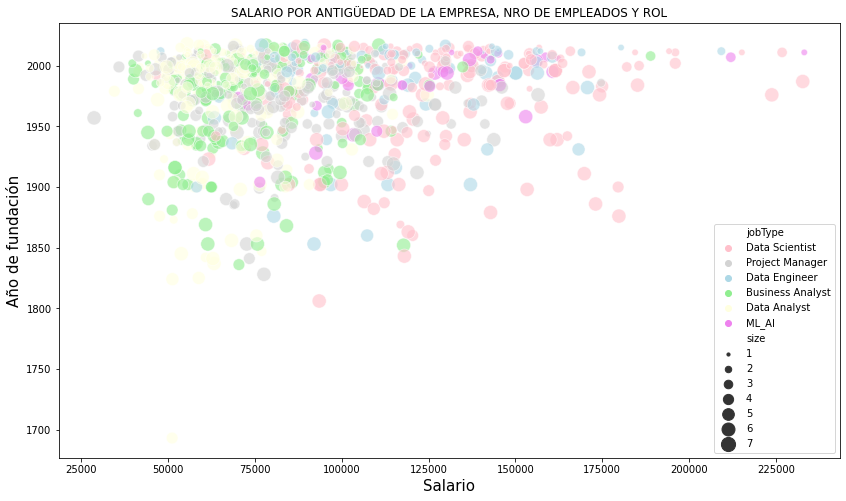

In [42]:
vtb.graf_snsscat(xval="sal", yval='foundedYear', hueval="jobType",df=s_df, sizval=s_df["size"],colorval= color_jT, heival=14,widval=8, xlab="Salario",ylab="Año de fundación",titval= "SALARIO POR ANTIGÜEDAD DE LA EMPRESA, NRO DE EMPLEADOS Y ROL", fname="SalDSRolAntEmp_scat")

En esta gráfica se observa con claridad como varia el salario en función al rol, siendo los menos retribuidos los roles asociados a Analistas de Datos, luego Analistas de Negocios y aumentando a medida que el rol va requiriendo más experticia técnica o más nivel de especialización ( Ingenieros de Datos, Científicos de Datos y Machine Learning)

In [43]:
vtb.graf_glscat(df=s_df,xval="sal",yval="foundedYear",tval="empName",sval="size",colorval="size",titval = "Salario medio por antigüedad de la empresa y número de empleados",widval=900,heival=600, fname="SalDSAntEmp_Gscat")

Los salarios más altos están en empresas de antigüedad menor ( más innovadoras y menos tradicionales) y de menor tamaño (desde el punto de vista de número de empleados)

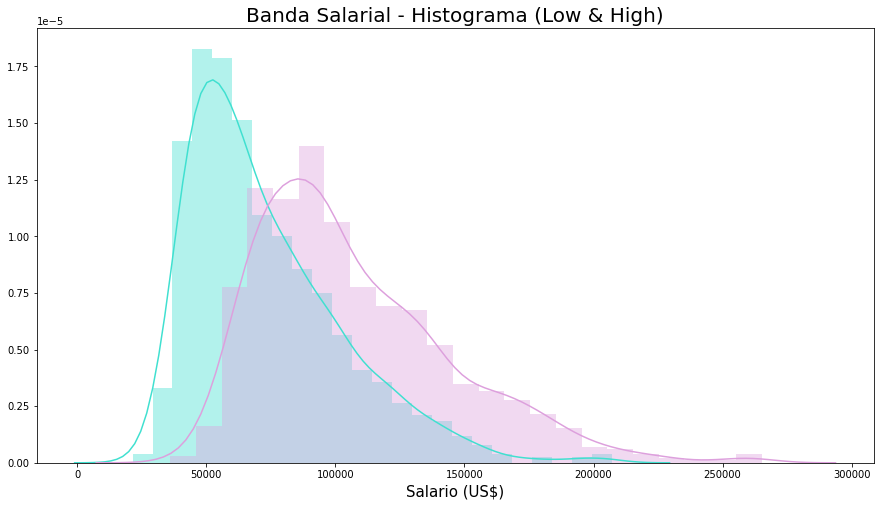

In [44]:
plt.figure(figsize=(15,8))
vtb.graf_hist(df=s_df,colval="salLow", colorval="turquoise", titval="Banda Salarial - Histograma (Low & High)", xlab= "Salario (US$)", fname="Sal_HistBandas")
vtb.graf_hist(df=s_df,colval="salHigh", colorval="plum", titval="Banda Salarial - Histograma (Low & High)", xlab= "Salario (US$)",sh=True, fname= "Sal_HistBandas")

Para el total de la oferta en el área de Data science, la banda salarial se mueve entre los 50.000 dólares anuales a 90.000 dólares anuales. Ambas curvas se asemejan a una campana de gauss y están dispersos en torno a los valores de los picos de la curva (con mayor dispersión para el caso del tope superior de la banda salarial donde hay  mayor desviación con respecto a la media])

In [45]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 22 to 110816
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   empSize      983 non-null    object        
 1   easyApply    983 non-null    bool          
 2   empName      983 non-null    object        
 3   jobTitle     983 non-null    object        
 4   jobDate      983 non-null    datetime64[ns]
 5   salHigh      983 non-null    float64       
 6   salLow       983 non-null    float64       
 7   jobDesc      983 non-null    object        
 8   jobSource    983 non-null    object        
 9   country      983 non-null    object        
 10  lat          983 non-null    float64       
 11  long         983 non-null    float64       
 12  location     983 non-null    object        
 13  foundedYear  983 non-null    int64         
 14  industry     983 non-null    object        
 15  revenue      983 non-null    object        
 16  sect

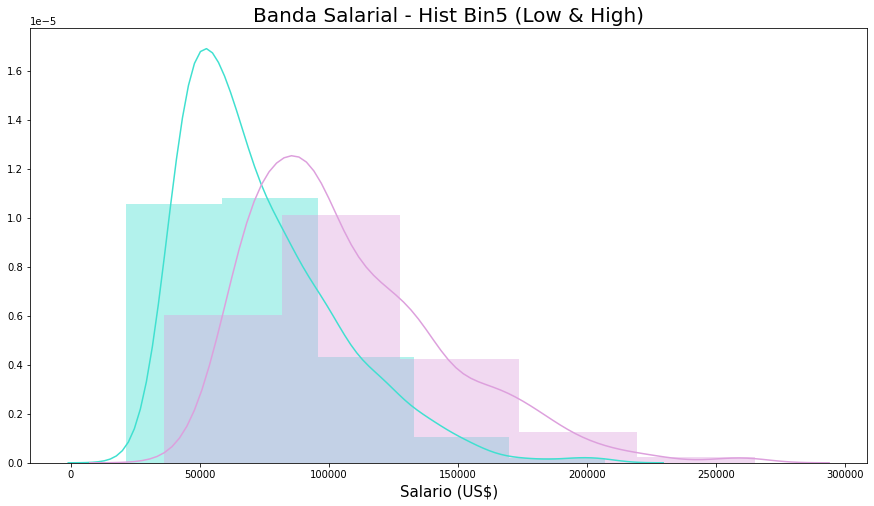

In [46]:
# Histograma de bandas salariales con BIN = 5
plt.figure(figsize=(15,8))
vtb.graf_hist(df=s_df,colval="salLow", colorval="turquoise", titval="Banda Salarial - Hist Bin5 (Low & High)", xlab= "Salario (US$)", fname="Sal_HistBand_B5",binval=5 )
vtb.graf_hist(df=s_df,colval="salHigh", colorval="plum", titval="Banda Salarial - Hist Bin5 (Low & High)", xlab= "Salario (US$)",sh=True, fname= "Sal_HistBand_B5", binval=5)

Si disminuímos la cantidad de rangos (bins) a 5, disminuye la eficiencia del análisis y el mismo ya no es tan representativo de la realidad, pues perdemos precisión en como se distribuyen realmente los datos. Pocos bins son ideales cuando tenemos menos de 50 observaciones.  
 
Por el contrario, un número de bins muy grande es más representativo pero también dificulta el análisis. Por ello, para esta cantidad de datos (más de 100), es razonable la propuesta de la herramienta de 15 bins

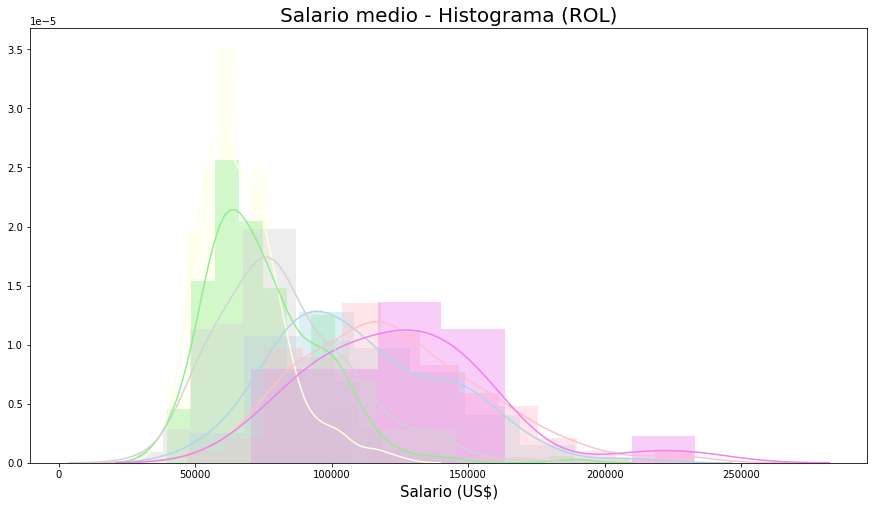

In [47]:
# Histogramas de salario por tipo de trabajo 
plt.figure(figsize=(15,8))
ultimo = list(color_jT.items())[-1][0]
shval =False
for clave, valor in color_jT.items(): 
    if clave == ultimo:
        shval=True
    vtb.graf_hist(df=s_df[(s_df.jobType==clave)], colval="sal", colorval=valor,titval="Salario medio - Histograma (ROL)", xlab= "Salario (US$)",sh=shval, fname="SalRol_Hist")




Viendo los datos de salario medio (media entre el límite inferior y superior de la banda), observamos que hay mayor dispersión en los mismos ( y son más altos pues en frecuencia están más desplazados a la derecha ) cuando el rol es más especializado o complejo

## `4.3` Outliers (Gráficos de caja)

In [48]:
vtb.graf_gobox(s_df, colval="jobType", ycol="sal", diccol=color_jT, titval ="Box Plot - Salario (US$) por ROL (Data Science & Project Management)", widval= 900, heival=600, fname= "SalRol_Box")

In [49]:
# Ver quienes son los outliers (en términos de salario). Se incorporan en un dataframe
outl_df = s_df[
    ((s_df['jobType']=="Data Analyst")& (s_df["sal"]>103441) ) |
    ((s_df['jobType']=="Business Analyst")& (s_df["sal"]>125224) ) | 
    ((s_df['jobType']=="Data Engineer")& (s_df["sal"]>209267) ) |
    ((s_df['jobType']=="Data Scientist")& (s_df["sal"]>196020) ) | 
    ((s_df['jobType']=="ML_AI")& (s_df["sal"]>212000) )  |   
    ((s_df['jobType']=="Project Manager")& (s_df["sal"]>143774) )   
]

Son 20 ofertas en total.....  
Veamos de quien se trata 

In [50]:
vtb.graf_glscat(df=outl_df,xval="sal",yval="foundedYear",tval="empName",sval="size",colorval="size",titval = "OUTLIERS (Salario) - ANTIGÜEDAD DE LA EMPRESA Y NRO DE EMPLEADOS",widval=900,heival=600, fname="SalOutl_Scat")

Las empresas outliers son en su mayoria empresas tecnológicas  pequeñas (menos de 500 empleados) o del sector salud (biotecnología y farmacéuticas) (más de 5000 empleados)

In [63]:
s_df.empSize.value_counts()

1001-5000     253
10000--1      200
201-500       181
501-1000      149
51-200        129
5001-10000     58
1-50           13
Name: empSize, dtype: int64

In [51]:
vtb.graf_sbpie (df=outl_df,lpath = ['sector', 'empName'], val="" ,col="sector",lcolor = color_sector ,tit= "SALARIO (OUTLIERS) POR SECTOR", det = False, fname="SalOutl_SectorPie")


Las empresas Outliers en términos de salarios pertenecen principalmente (más de la mitad) a los sectores de Tecnologia de Información, de investigación (farmacéutica, salud, biotecnología) y Aeroespacio y Defensa

## `4.4` Como se distribuye la oferta en el mundo?

### rworld_df
Creación de un dataframe con la información de oferta mundial sumarizada por país y rol

In [52]:
rworld_df = (res_df.groupby(['cname','jobType', 'jobClas'])['total'].sum()).to_frame()
rworld_df.reset_index(inplace=True)

In [53]:
vtb.graf_mapam(rworld_df,locval="cname",locmodval="country names",colorval = "jobType", hovval = "cname", sval ="total",colorsval=color_jT2,widval=900, heival=600,titval= "OFERTA LABORAL EN DATA SCIENCE POR ROL  - MAPA MUNDIAL", legval="ROL", fname= "JobsxRol_MM")


Los principales paises con oferta en los niveles más especializados de Data Science son: Estados Unidos, Canada, Alemania, Francia, Reino Unido, India e Israel  
Para los niveles más básicos (Analistas), se agregan a esta lista Suiza, Bélgica, Holanda y Australia.  

Europa es el continente donde se concentra la mayor cantidad de ofertas en esta área

## `4.5` Correlación entre variables

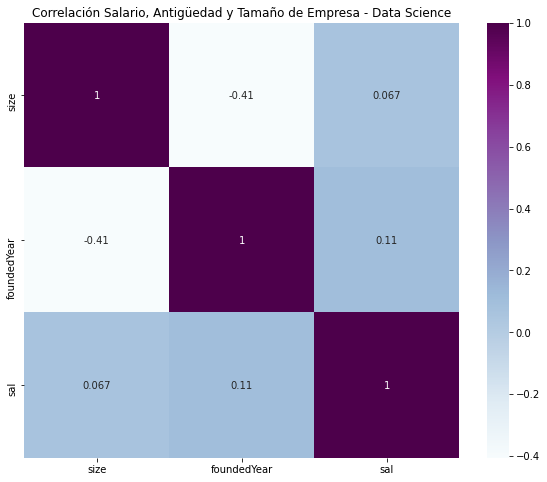

In [54]:
corr = s_df.loc[:,["size", "foundedYear", "sal"]].corr()    # Columnas numéricas a correlacioanr
vtb.graf_corr(corr, "BuPu", "Correlación Salario, Antigüedad y Tamaño de Empresa - Data Science","DSjobs_corr") 

No se observa correlación entre estas variables. Veamos ahora la matriz para cada uno de los roles...

### Matriz de correlación entre variables (por rol).


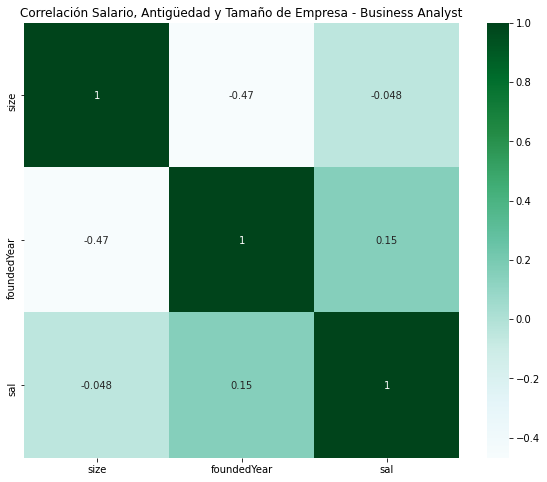

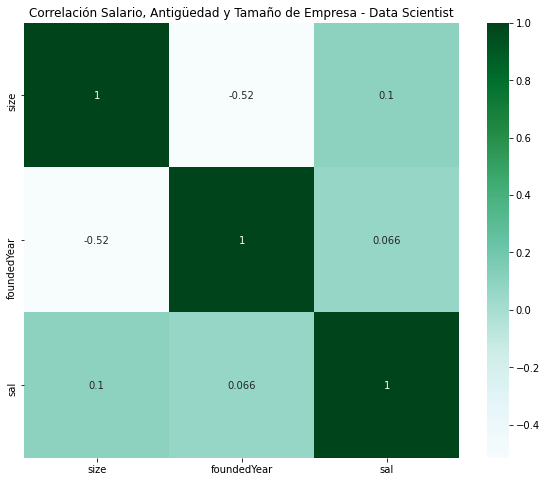

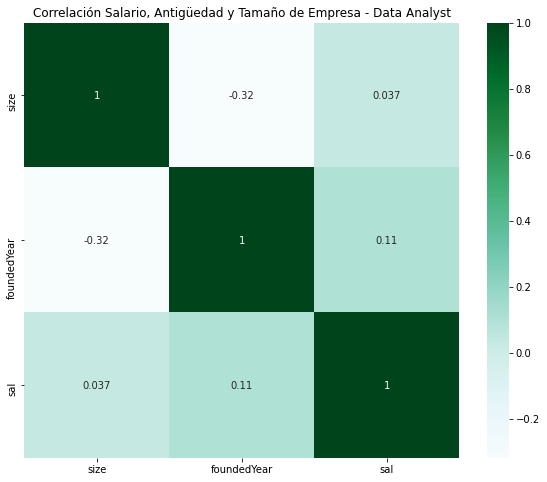

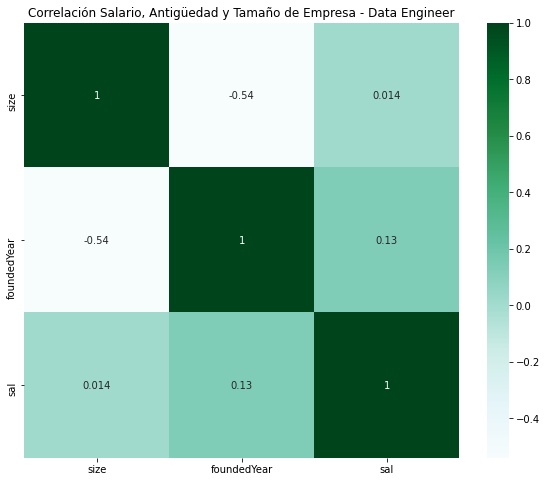

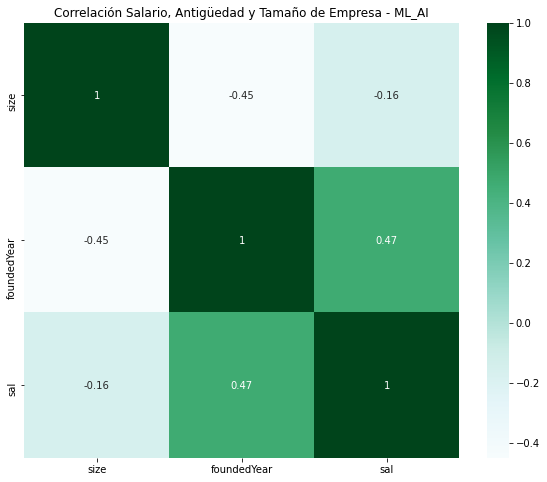

In [55]:
ljobs= cjob_df[cjob_df.jobClas=="Data Science"]["jobType"].to_list()
for elem in ljobs:
    corr = s_df[s_df.jobType==elem].loc[:,["size", "foundedYear", "sal"]].corr()    
    vtb.graf_corr(corr, "BuGn", "Correlación Salario, Antigüedad y Tamaño de Empresa - "+ elem, elem+ "_corr") 

Para el análisis de correlación utilizamos las únicas 3 variables numéricas (Salario medio, Tamaño de la empresa y Antigüedad de la empresa (por año de fundación).  
Viendo los datos de manera global no se observa correlación alguna entre las variables, sin embargo al analizarlos filtrando por rol vemos que para el caso de Ingenieros de datos o Ciencias de datos se puede ver una  correlación negativa baja (un poco mayor a 0.5) entre el año de fundación de la empresa y el tamano de la misma. Esto se puede interpretar como que empresas más nuevas (año de fundación es mayor) ]) son más pequeñas (en términos de cantidad de empleados). Esto es bastante lógico pues son profesiones muy recientes que han impulsado la creación, en los últimos años de empresas dedicadas a este rubro.

## `5.` Creación de archivo Json con los datos limpios, resumidos y procesados
________________
Luego de obtener el data set inicial, cargarlo en un Dataframe (pandas), y de haber realizado el proceso de corrección , estandarización y limpieza de los datos; se crearon los siguientes Data Frames que estarán a disposición en formatos json y csv (en carpetas dentro del directorio resources ) para poder ser compartidos y utilizados

- GDjobs_df : Dataframe principal. Detallado y limpio. Sin registros duplicados. Todos los países están estandarizados, los valores nulos fueron reemplazados por "N/A"  

- res_df:  Dataframe resumen con información agrupada.  

- DS_df:   Subconjunto del dataframe principal  Trabajos asociados a ciencia de datos.  

- emp_df:  Dataframe con información agrupada por empresa (para conocer los nombres de las empresas que más oferta hacen en el área de DS)]  

- s_df:     Dataframe con Tipos de trabajo como Project Manager o DS, salarios >0 y empresas bien identificadas (tamaño y antiguedad) para análisis de salarios por perfil. NOTA:  Incluye el rol de Project Manager como una referencia comparativa a contrastar con los roles en Data Science   

- rworld_df:  Dataframe agrupado por país 

In [56]:
dfs = {'GDjobs_df':GDjobs_df , 'res_df': res_df,'DS_df': DS_df,'emp_df': emp_df,'s_df': s_df,'rworld_df': rworld_df}

In [57]:
for clave, valor in dfs.items(): 
    ftb.exportar_json(valor, "../resources/json/",clave)
    ftb.exportar_csv(valor, "../resources/csv/",clave)


## `6.` Datos del proyecto 
________________
El seguimiento al proyecto fué realizado en Trello. Las horas dedicadas a cada etapa (registradas en Excel) fueron exportadas a un archivo CSV que será cargado en un dataframe para visualizar los tiempos totales. 

In [58]:
proy_df = pd.read_csv("../resources/dataset/tareas.csv", sep=";")

In [59]:
vtb.graf_pie(df=proy_df,val="HORAS",col='FASE', tit= "HORAS DEDICADAS POR FASE", lcolor= colors_fase, fname= "Horas_pie" )

In [60]:
vtb.graf_sbpie (df=proy_df,lpath= ['FASE', 'ETAPA'],val = proy_df['HORAS'],lcolor = colors_fase, col = "FASE",tit= "HORAS DEDICADAS POR ETAPA", det=True, fname="Horas_SBpie")

In [61]:
vtb.graf_proy(df=proy_df, xval= "ETAPA",yval="HORAS", colval="FASE", lcolors= colors_fase ,widval= 900, heival=600, titval="Horas dedicadas por Fase y Etapa - DS Jobs", fname= "HorasxEt_bar")

In [62]:
vtb.graf_proy(df=proy_df, xval= "FASE",yval="HORAS", colval="ETAPA", lcolors= colors_etapa ,widval= 900, heival=600, titval="Horas dedicadas por Etapa y Fase - DS Jobs",fname= "HorasxFase_bar")

## `CONCLUSIÓN`
________________

### `1.` Demostración de la hipótesis.  

De la totalidad de oferta de empleos técnicos ,  
*** 21% corresponde a trabajos relacionados con Datos   ***   
9% a Gerencia de Proyectos  
70% a otros trabajos técnicos (tal como Desarrollo de Sofware/aplicaciones, Soporte Técnico, Gerencia de Operaciones, Calidad , Ingenieros de software, Científicos o Investigadores)  

Vemos que dentro del 21% que representa la oferta de  Data Science, `el 55%, corresponde a perfiles de Análisis de Datos y Análisis de Negocios` (un 11,5% del total de la ofertas analizadas). Con esto queda comprobada (como `cierta`) la hipótesis planteada.
_________________
### `2.` Conclusiones del análisis de datos  

INDUSTRIA  
Sólo el 70% de los registros clasificados como roles de Data Scientist tenían la industria tipificada. De estos las primeras 5  (en las que se concentra el  45% de la oferta) se concentra en la industria tecnológica y de consultoría.    
Si vemos la gráfica por industria únicamente para el rol de Business Analist, el sector de Banca e Inversión desplaza a Internet  y se coloca  entre los 5 primeros.

SECTOR  
Los 3 primeros sectores (Tecnología de Información, Servicios de negocio y Finanzas) concentran el 60% de la oferta. Esta proporción se mantiene para todos los roles de DS analizados.  

TIPO DE EMPRESA  
El 50% de la oferta proviene de empresas de naturaleza privada y el 32% de caracter público.  

EMPRESAS  
Amazon concentra la mayor cantidad de oferta de empleo en general, sin embargo para los roles de DS, el primer lugar lo ocupa la empresa Hays (consultora de selección de personal especializada). Otras dos grandes empresas de selección de personal ( myitjobs y Gotfriends (israelí)) están también en los primeros lugares.) Amazon y  las empresas de consultoría estratégica (como BCG, McKinsey) son, según esto, quienes más  se  están desarrollando en este sentido.  

NIVEL DE EXPERIENCIA  
Aunque sólo el 25% de las ofertas en Data Science especificaban el nivel de experiencia requerida para el cargo (19.6% Senior, 4.2% Junior y 1.2 recién titulados), en el 80% de los casos buscan perfiles senior. Esto es  más notable para el caso de los roles más especializados (data scientist y machine learning) donde el 85% de las ofertas requiere profesionales  nivel senior (versus el 70% en el caso de Data Analists).

80% perfiles Senior, 16.2% perfiles junior y solo 3.8% (recién titulados o en prácticas)  

OFERTA POR TIPO Y ANTIGÜEDAD DE EMPRESA  
ALrededor de 1/3 de las ofertas está en empresas pequeñas (menos de 200 empleados), 1/3 en ofertas de empresas entre 200 y 10.000 empleados y el otro tercio restante en empresas grandes (más de 10.000 empleados). Esta proporción se mantiene a lo largo de todos los roles analizados]

SALARIOS  
En las gráficas se observa con claridad como varía el salario en función al rol, siendo los menos retribuidos los roles asociados a Analistas de Datos, luego Analistas de Negocios y aumentando a medida que el rol va requiriendo más experticia técnica o más nivel de especialización ( Ingenieros de Datos, Científicos de Datos y Machine Learning)

Los salarios más altos están en empresas de antigüedad menor ( más innovadoras y menos tradicionales) y de menor tamaño (desde el punto de vista de número de empleados)

Para el total de la oferta en el área de Data science, la banda salarial se mueve entre los 50.000 dólares anuales a 90.000 dólares anuales. Ambas curvas se asemejan a una campana de gauss y están dispersos en torno a los valores de los picos de la curva (con mayor dispersión para el caso del tope superior de la banda salarial donde hay  mayor desviación con respecto a la media])

Si disminuímos la cantidad de rangos (bins) a 5, disminuye la eficiencia del análisis y el mismo ya no es tan representativo de la realidad, pues perdemos precisión en como se distribuyen realmente los datos. Pocos bins son ideales cuando tenemos menos de 50 observaciones.  
 
Por el contrario, un número de bins muy grande es más representativo pero también dificulta el análisis. Por ello, para esta cantidad de datos (más de 100), es razonable la propuesta de la herramienta de 15 bins

Viendo los datos de salario medio (media entre el límite inferior y superior de la banda), observamos que hay mayor dispersión en los mismos ( y son más altos pues en frecuencia están más desplazados a la derecha ) cuando el rol es más especializado o complejo.

OUTLIERS  
Las empresas outliers son en su mayoria empresas tecnológicas  pequeñas (menos de 500 empleados) o del sector salud (biotecnología y farmacéuticas) (más de 5000 empleados)

. Las empresas Outliers en términos de salarios pertenecen principalmente (más de la mitad) a los sectores de Tecnologia de Información, de investigación (farmacéutica, salud, biotecnología) y Aeroespacio y Defensa

OFERTA MUNDIAL   
. Los principales paises con oferta en los niveles más especializados de Data Science son: Estados Unidos, Canada, Alemania, Francia, Reino Unido, India e Israel  
Para los niveles más básicos (Analistas), se agregan a esta lista Suiza, Bélgica, Holanda y Australia.  
. Europa es el continente donde se concentra la mayor cantidad de ofertas en esta área.

CORRELACIÓN  
. Para el análisis de correlación utilizamos las únicas 3 variables numéricas (Salario medio, Tamaño de la empresa y Antigüedad de la empresa (por año de fundación).  
Viendo los datos de manera global no se observa correlación alguna entre las variables, sin embargo al analizarlos filtrando por rol vemos que para el caso de Ingenieros de datos o Ciencias de datos se puede ver una  correlación negativa baja (un poco mayor a 0.5) entre el año de fundación de la empresa y el tamano de la misma. Esto se puede interpretar como que empresas más nuevas (año de fundación es mayor) ]) son más pequeñas (en términos de cantidad de empleados). Esto es bastante lógico pues son profesiones muy recientes que han impulsado la creación, en los últimos años de empresas dedicadas a este rubro.  



### `3.` Que cambiaría al hacer otro proyecto de EDA. 
- Tomaría datos más actualizados. La decisión sobre la fuente de datos utilizada fué principalmente por el corto tiempo.

### `4.` Aprendizaje en este proyecto.
- El tiempo a invertir en el proceso de limpieza y depuración de los datos superó con creces mis expectativas y eso restó tiempo al resto de las fases del proyecto. Lo consideraré en proyectos a futuro.
- Luego de este proyecto estoy bastante más familiarizada con el funcionamiento de los gráficos (como objetos), las librerías para graficar y sus diferencias, sin embargo me hubiera gustado tener más tiempo para explotar los "features" y características de cada uno y utilizarlos de forma más avanzada.
- Como uno de los objetivos adicionales me hubiera gustado analizar las ofertas por rol para ver las herramientas más pedidas en cada uno (por ejemplo, Python, Spark, SQL, Tableau, Power BI), Tensorflow y afinar así mi formación ]

### `5.` Horas del proyecto.
- El tiempo total dedicado al  proyecto fué de 102 horas 
- Un 63% del tiempo fue dedicado  a las tareas relacionadas con los datos y de esto casi la mitad ( 32 horas) fueron estandarizando y limpiando los datos para su posterior utilización (i.e. el 31% del tiempo total del proyecto)
